#Imports

In [1]:

import pandas as pd
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve
from sklearn import svm, datasets
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.stats as stats



df = pd.read_csv("reprocessed.cleveland.csv")
df.shape


(297, 14)

#EDA


In [2]:
#EDA - Checks data for null values and gives overview of dataset.

#Other preprocessing was done before being imported into ipynb

#Null values were removed, labels were added and condition columns was condensed into 0 or 1. 

print("Null values")
print(df.isnull().sum())

print(df.info)

Null values
age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64
<bound method DataFrame.info of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   1       145   233    1        2      150      0      2.3   
1     67    1   4       160   286    0        2      108      1      1.5   
2     67    1   4       120   229    0        2      129      1      2.6   
3     37    1   3       130   250    0        0      187      0      3.5   
4     41    0   2       130   204    0        2      172      0      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
292   57    0   4       140   241    0        0      123      1      0.2   
293   45    1   1       110   264    0        0      132      0      1.2   
294   68    1   4       144   193    1        0  

#Outliers Removed

In [3]:
#Outliers

#find Q1, Q3, and interquartile range for each column
Q1 = df.quantile(q=.25)
Q3 = df.quantile(q=.75)
IQR = df.apply(stats.iqr)

#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
data_clean = df[~((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR))).any(axis=1)]

#find how many rows are left in the dataframe 
data_clean.shape
df = data_clean
df.shape

(212, 14)

# Helper Function to compute results.


In [4]:

# adapted from https://www.kaggle.com/faressayah

def print_score(features, target, clf, text):
  # use the given model to predict on the given features
  pred = clf.predict(features)

  # produce a classification report using sklearn's methods
  clf_report = pd.DataFrame(classification_report(target, pred, output_dict=True))

  # display everything in a formatted way
  print(text, " Result:\n================================================")
  print(f"Accuracy Score: {accuracy_score(target, pred) * 100:.2f}%")
  print("_______________________________________________")
  
  print(f"CLASSIFICATION REPORT:\n{clf_report}")
  print("_______________________________________________")
  
  cm = confusion_matrix(target, pred)
  sns.heatmap(cm, annot=True)
  # can also write the cm as text
  print(f"Confusion Matrix: \n {cm}\n")

# Histogram

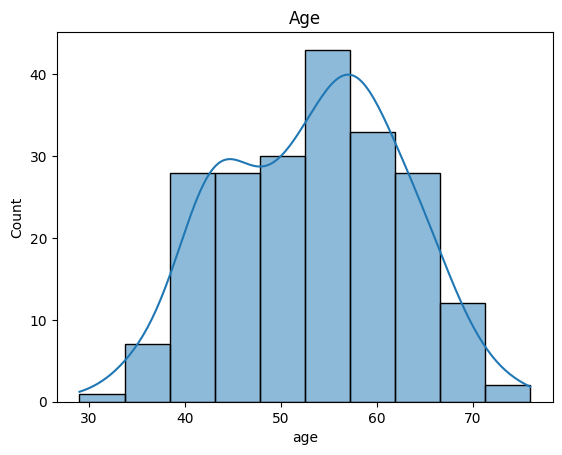

In [5]:
plt.title("Age")
sns.histplot(data=df, x='age', kde=True)
plt.show()

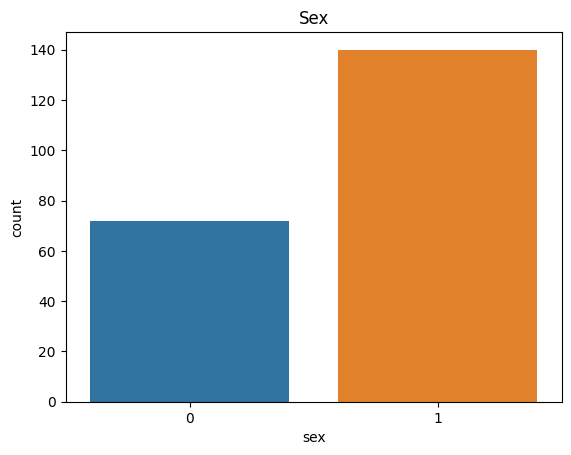

In [6]:
plt.title("Sex")
sns.countplot(data=df, x='sex')
plt.show()

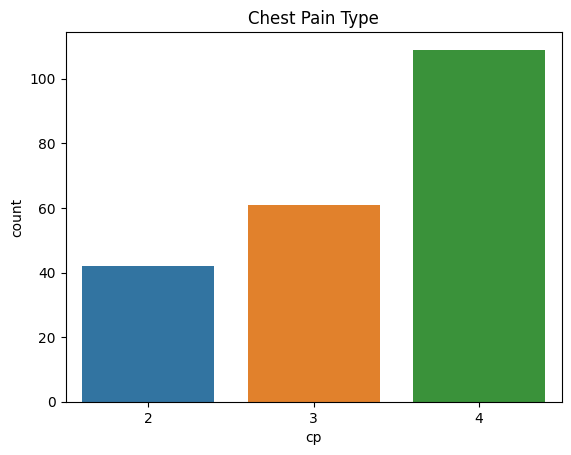

In [7]:
plt.title("Chest Pain Type")
sns.countplot(data=df, x='cp')
plt.show()

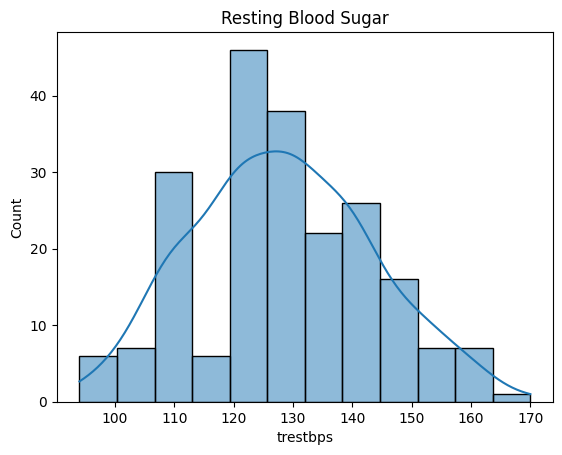

In [8]:
plt.title("Resting Blood Sugar")
sns.histplot(data=df, x='trestbps', kde=True)
plt.show()

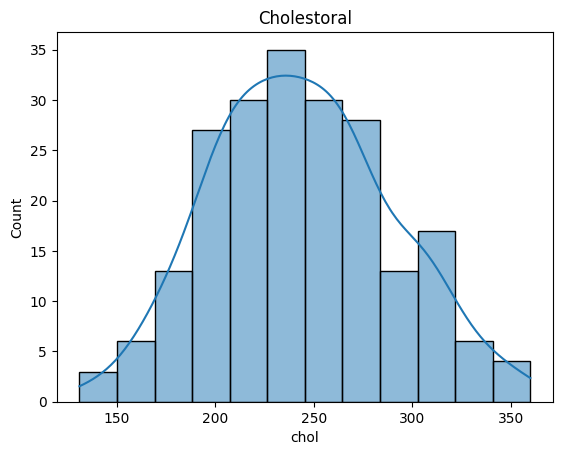

In [9]:
plt.title("Cholestoral")
sns.histplot(data=df, x='chol', kde=True)
plt.show()

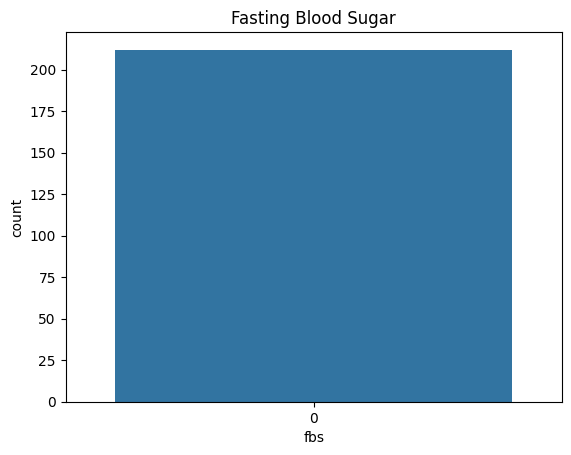

In [10]:
plt.title("Fasting Blood Sugar")
sns.countplot(data=df, x='fbs')
plt.show()

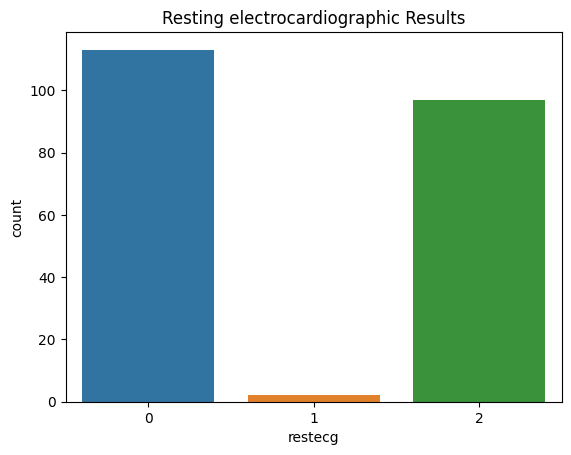

In [11]:
plt.title("Resting electrocardiographic Results")
sns.countplot(data=df, x='restecg')
plt.show()

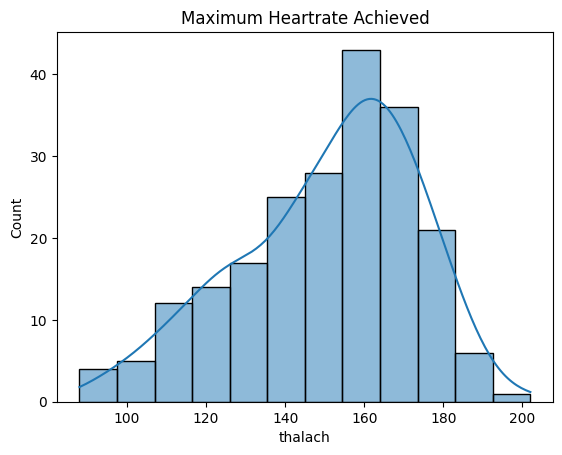

In [12]:
plt.title("Maximum Heartrate Achieved")
sns.histplot(data=df, x='thalach', kde=True)
plt.show()

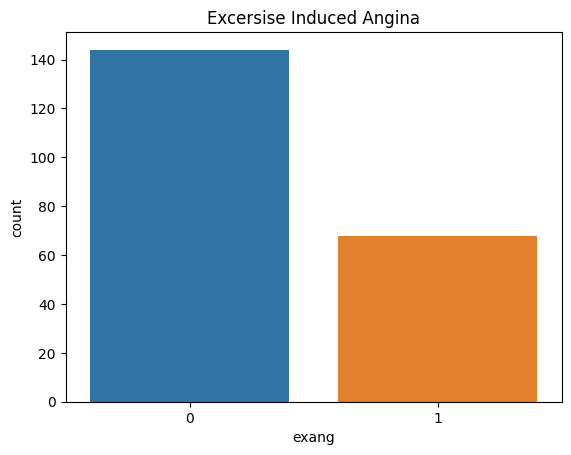

In [13]:
plt.title("Excersise Induced Angina")
sns.countplot(data=df, x='exang')
plt.show()

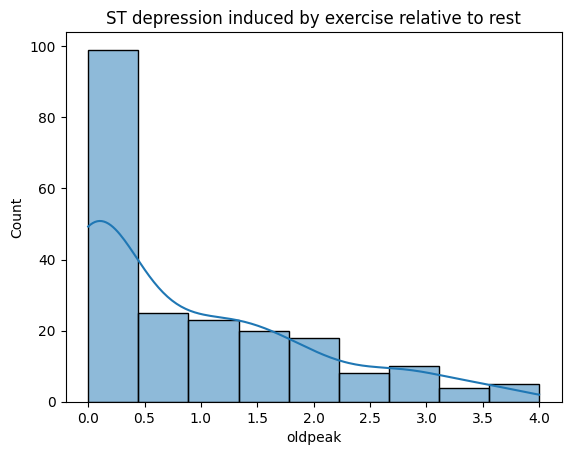

In [14]:
plt.title("ST depression induced by exercise relative to rest")
sns.histplot(data=df, x='oldpeak', kde=True)
plt.show()

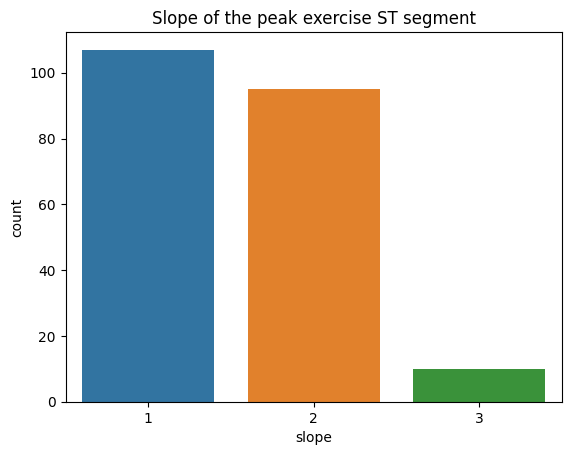

In [15]:
plt.title("Slope of the peak exercise ST segment")
sns.countplot(data=df, x='slope')
plt.show()

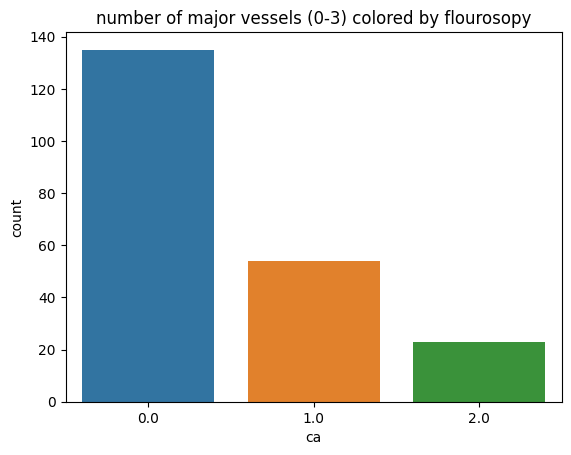

In [16]:
plt.title("number of major vessels (0-3) colored by flourosopy")
sns.countplot(data=df, x='ca')
plt.show()

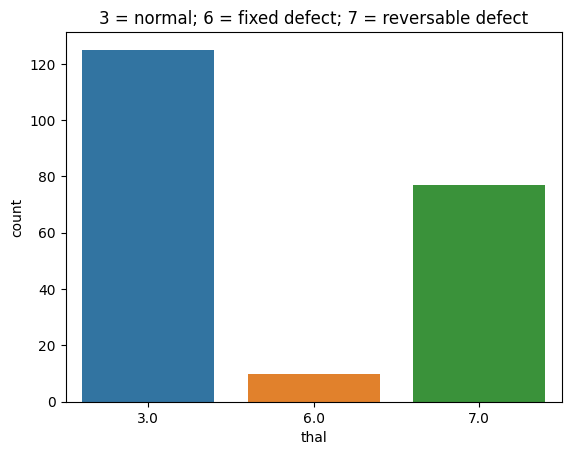

In [17]:
plt.title("3 = normal; 6 = fixed defect; 7 = reversable defect")
sns.countplot(data=df, x='thal')
plt.show()

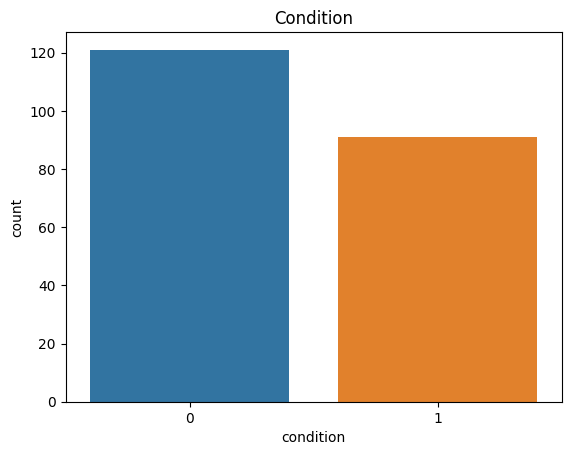

In [18]:
plt.title("Condition")
sns.countplot(data=df, x='condition')
plt.show()

# First Model - All Features




In [19]:
#set up model
model = LogisticRegressionCV()

# separating the dependent variables and the independent variables
X = df.iloc[:,:13]
y = df["condition"]
print(X.shape, y.shape)
X.head()


#train test split
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=.2)


(212, 13) (212,)


## Train the Model


In [20]:
#train the model
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LogisticRegressionCV()

##Results

Training  Result:
Accuracy Score: 85.21%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precision   0.854369   0.848485  0.852071    0.851427      0.851897
recall      0.897959   0.788732  0.852071    0.843346      0.852071
f1-score    0.875622   0.817518  0.852071    0.846570      0.851211
support    98.000000  71.000000  0.852071  169.000000    169.000000
_______________________________________________
Confusion Matrix: 
 [[88 10]
 [15 56]]



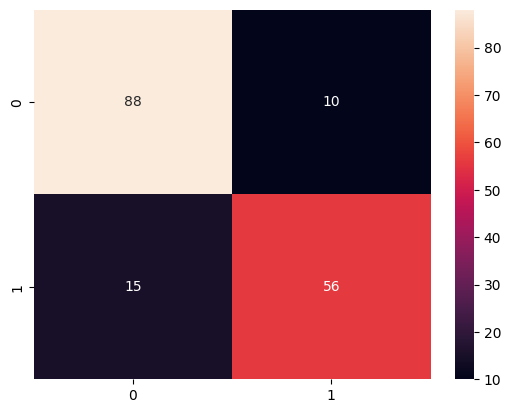

In [21]:
#print training results
print_score(X_train, y_train, model, 'Training')

Testing  Result:
Accuracy Score: 86.05%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.904762   0.818182  0.860465   0.861472      0.864492
recall      0.826087   0.900000  0.860465   0.863043      0.860465
f1-score    0.863636   0.857143  0.860465   0.860390      0.860616
support    23.000000  20.000000  0.860465  43.000000     43.000000
_______________________________________________
Confusion Matrix: 
 [[19  4]
 [ 2 18]]



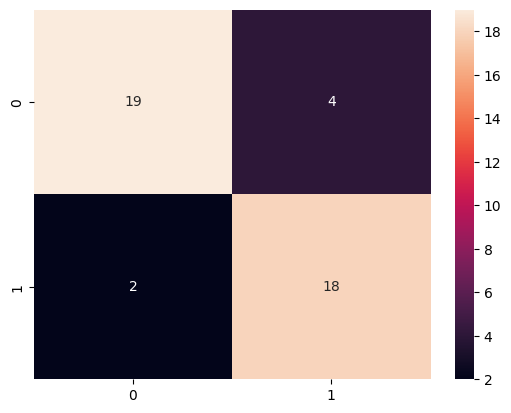

In [22]:
#print test results
print_score(X_test, y_test, model, 'Testing')

##ROC Curves

ROC AUC = 0.91


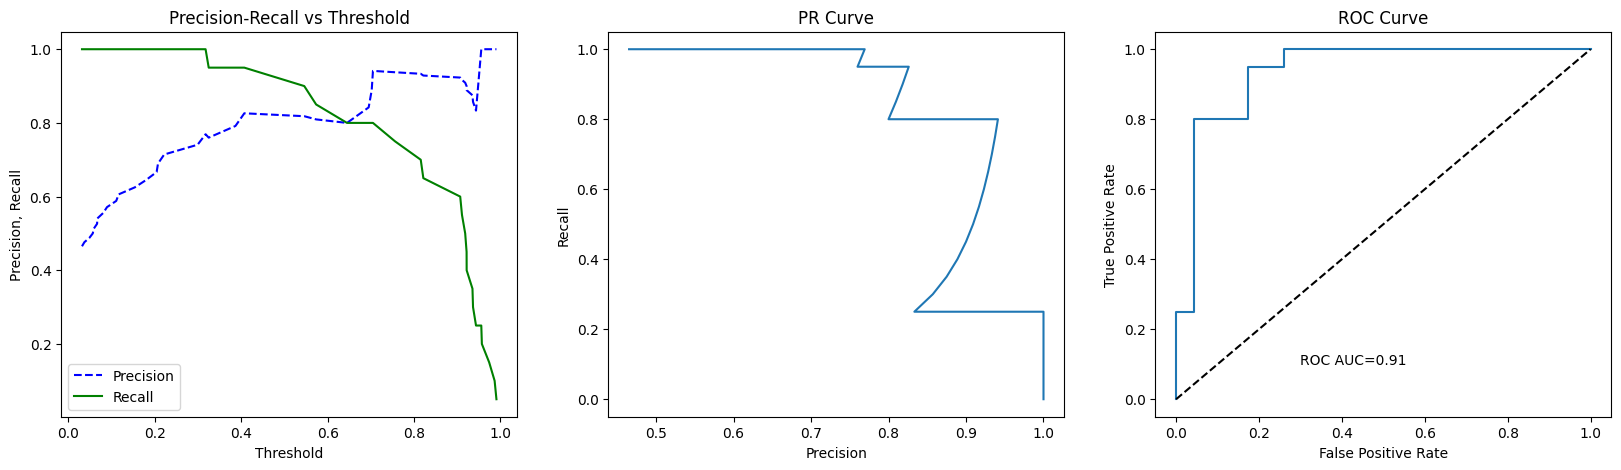

In [23]:

#predict crisp values and probabilities
y_pred = model.predict(X_test) # crisp predictions (0 or 1)
y_probs = model.predict_proba(X_test) # probability predictions between [0, 1]
'''
y_probs is a 2D array where
column0 is the probability of being labelled as 0
column1 is the probability of being labelled as 1 << we want this one
it will be y_probs[:, 1]
'''


# use crisp and proba to derive the metrics
precision, recall, thresholds = precision_recall_curve(y_test, y_probs[:,1]) 

# PR curve with various thresholds
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.title("Precision-Recall vs Threshold")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "g-", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")

# P versus R curve
plt.subplot(1, 3, 2)
plt.plot(precision, recall)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve");

# ROC curve (FPR versus FNR)

ax3 = plt.subplot(1, 3, 3)
fpr, tpr, thresholds = roc_curve(y_test, y_probs[:,1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], "k--") # the dashed line (50-50 prediction)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

# AUC

pr_auc = np.round(auc(recall, precision),2)
ax3.text(0.3, 0.1, 'ROC AUC='+str(pr_auc))#, horizontalalignment='center', verticalalignment='center', transform=ax3.transAxes)

print('ROC AUC =', pr_auc)

##Correlation Matrix

In [24]:
plt.figure(figsize=(12,12))


# Creating Mask
mask = np.triu(np.ones_like(df.corr()))

#Correlation Matrix
print(df.corrwith(df.condition))


age          0.242075
sex          0.360315
cp           0.465692
trestbps     0.112378
chol         0.045846
fbs               NaN
restecg      0.181185
thalach     -0.431334
exang        0.445316
oldpeak      0.464006
slope        0.336028
ca           0.475611
thal         0.599546
condition    1.000000
dtype: float64


<Figure size 1200x1200 with 0 Axes>

## Analysis

From the first model our accuracy was 76.67%. The correlation matrix shows that 'chol' and 'fbs' feature have the lowest correlation to the target. we will now retrain the model without these features.

# Second Model - Dropped 2 features


## Set up new dataframe


In [25]:
#drop columns 'chol' and 'fbs'
df2 = df.drop(columns=['chol', 'fbs'], axis=1)

df2.head

<bound method NDFrame.head of      age  sex  cp  trestbps  restecg  thalach  exang  oldpeak  slope   ca  \
2     67    1   4       120        2      129      1      2.6      2  2.0   
3     37    1   3       130        0      187      0      3.5      3  0.0   
4     41    0   2       130        2      172      0      1.4      1  0.0   
5     56    1   2       120        0      178      0      0.8      1  0.0   
6     62    0   4       140        2      160      0      3.6      3  2.0   
..   ...  ...  ..       ...      ...      ...    ...      ...    ...  ...   
289   63    0   4       124        0      136      1      0.0      2  0.0   
290   41    1   2       120        0      182      0      0.0      1  0.0   
292   57    0   4       140        0      123      1      0.2      2  0.0   
295   57    1   4       130        0      115      1      1.2      2  1.0   
296   57    0   2       130        2      174      0      0.0      2  1.0   

     thal  condition  
2     7.0          1  

## Retrain the model


In [26]:
#Retrain
model2 = LogisticRegressionCV(random_state = 42)


# separating the dependent variables and the independent variables
X2 = df2.iloc[:,:11]
y2 = df2["condition"]
print(X.shape, y.shape)
X.head()

#train test split
(X_train2, X_test2, y_train2, y_test2) = train_test_split(X2, y2, test_size=.2)



#train the model
model2.fit(X_train2, y_train2)

(212, 13) (212,)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LogisticRegressionCV(random_state=42)

## Results 


Training  Result:
Accuracy Score: 89.35%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.909091   0.871429  0.893491    0.89026      0.893491
recall      0.909091   0.871429  0.893491    0.89026      0.893491
f1-score    0.909091   0.871429  0.893491    0.89026      0.893491
support    99.000000  70.000000  0.893491  169.00000    169.000000
_______________________________________________
Confusion Matrix: 
 [[90  9]
 [ 9 61]]



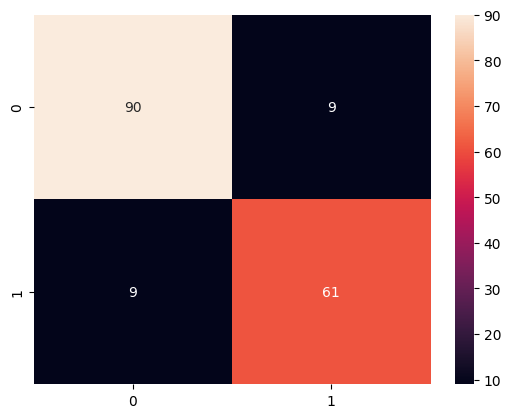

In [27]:
#Print the results from the second data
print_score(X_train2, y_train2, model2, 'Training')

Testing  Result:
Accuracy Score: 79.07%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.760000   0.833333  0.790698   0.796667      0.795814
recall      0.863636   0.714286  0.790698   0.788961      0.790698
f1-score    0.808511   0.769231  0.790698   0.788871      0.789327
support    22.000000  21.000000  0.790698  43.000000     43.000000
_______________________________________________
Confusion Matrix: 
 [[19  3]
 [ 6 15]]



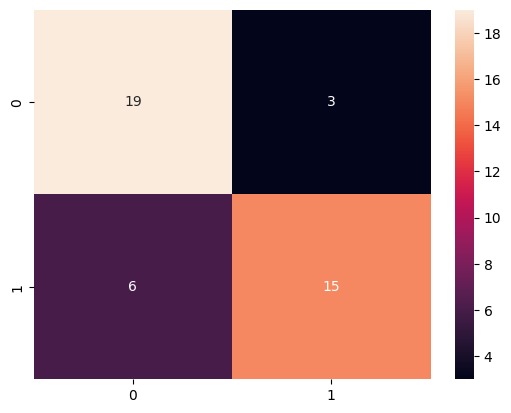

In [28]:
#Print the results from the second data
print_score(X_test2, y_test2, model2, 'Testing')

## ROC Curves

ROC AUC = 0.91


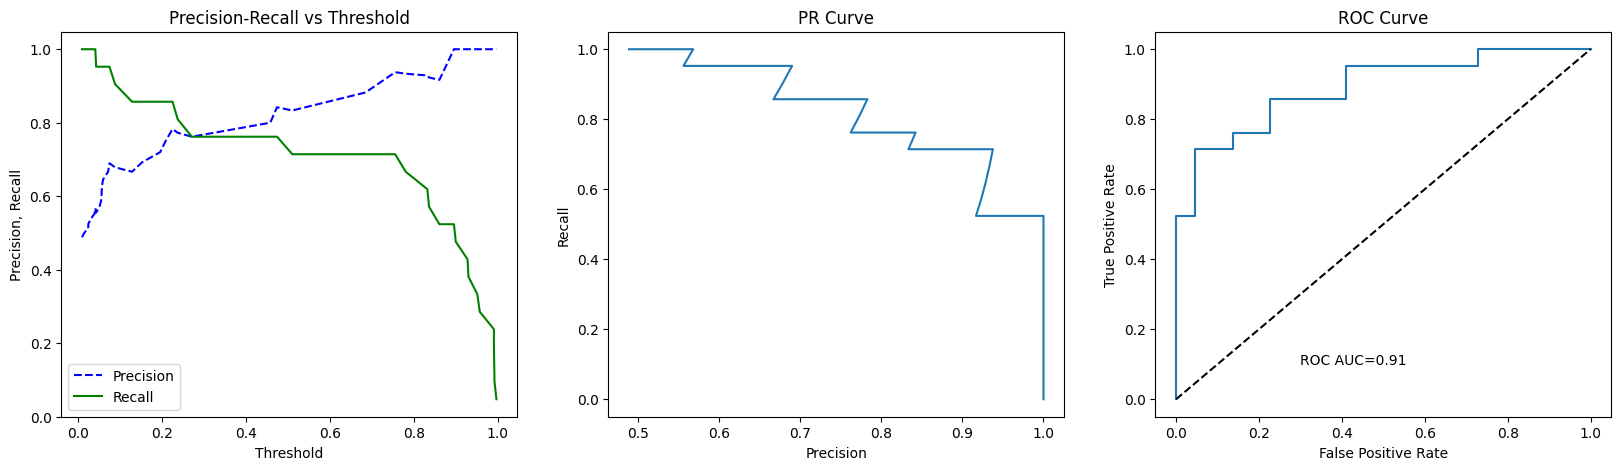

In [29]:
# predict crisp values and probabilities
y_pred = model2.predict(X_test2) # crisp predictions (0 or 1)
y_probs = model2.predict_proba(X_test2) # probability predictions between [0, 1]
'''
y_probs is a 2D array where
column0 is the probability of being labelled as 0
column1 is the probability of being labelled as 1 << we want this one
it will be y_probs[:, 1]
'''

# use crisp and proba to derive the metrics
precision, recall, thresholds = precision_recall_curve(y_test2, y_probs[:,1]) 

# PR curve with various thresholds
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.title("Precision-Recall vs Threshold")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "g-", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")

# P versus R curve
plt.subplot(1, 3, 2)
plt.plot(precision, recall)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve");

# ROC curve (FPR versus FNR)

ax3 = plt.subplot(1, 3, 3)
fpr, tpr, thresholds = roc_curve(y_test2, y_probs[:,1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], "k--") # the dashed line (50-50 prediction)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

# AUC

pr_auc = np.round(auc(recall, precision),2)
ax3.text(0.3, 0.1, 'ROC AUC='+str(pr_auc))#, horizontalalignment='center', verticalalignment='center', transform=ax3.transAxes)

print('ROC AUC =', pr_auc)

##Analysis

Much improved accuracy of 86.67% and AUC without the 'chol' and 'fbs'. Next method is going to try a solution where certain features are grouped.



# Third Model

##Set up new dataframe

In [30]:
#drop columns leaving only the best features
df = pd.read_csv("reprocessed.cleveland.csv")
df3 = df.drop(columns=['chol', 'fbs'], axis=1)
df3.head

<bound method NDFrame.head of      age  sex  cp  trestbps  restecg  thalach  exang  oldpeak  slope   ca  \
0     63    1   1       145        2      150      0      2.3      3  0.0   
1     67    1   4       160        2      108      1      1.5      2  3.0   
2     67    1   4       120        2      129      1      2.6      2  2.0   
3     37    1   3       130        0      187      0      3.5      3  0.0   
4     41    0   2       130        2      172      0      1.4      1  0.0   
..   ...  ...  ..       ...      ...      ...    ...      ...    ...  ...   
292   57    0   4       140        0      123      1      0.2      2  0.0   
293   45    1   1       110        0      132      0      1.2      2  0.0   
294   68    1   4       144        0      141      0      3.4      2  2.0   
295   57    1   4       130        0      115      1      1.2      2  1.0   
296   57    0   2       130        2      174      0      0.0      2  1.0   

     thal  condition  
0     6.0          0  

##Grouping features

Grouping is as follows:

oldpeak is split in 100%, 50%-99%, less than 50%.
cp is split into 3 or 0.
restecg is split 1 or not.
slope, ca and thal are all split into 0 or not.

this solution come from: https://www.kaggle.com/code/burakmarangoz88/logistic-regression-roc-96-acc-90#Model-4---New-grouping-features:

In [31]:
newpeak_list = []
for i in df3.oldpeak.values:
    a = len(df3[(df3.oldpeak == i) & (df3.condition == 1)]) / len(df3[(df3.oldpeak == i)])
    if a == 1:
        newpeak_list.append(2)
    elif a > 0.50:
        newpeak_list.append(1)
    else:
        newpeak_list.append(0)
df3["new_peak"] = newpeak_list


new_cp_list = []
for i in df3.cp.values:
    if i == 3:
        new_cp_list.append(1)
    else:
        new_cp_list.append(0)   
df3["cp_is_3"] = new_cp_list


new_res_list = []
for i in df3.restecg.values:
    if i == 1:
        new_res_list.append(1)
    else:
        new_res_list.append(0)      
df3["res_is_1"] = new_res_list


new_slope_list = []
for i in df3.slope.values:
    if i == 0:
        new_slope_list.append(1)
    else:
        new_slope_list.append(0)       
df3["slope_is_0"] = new_slope_list


new_ca_list = []
for i in df3.ca.values:
    if i == 0:
        new_ca_list.append(1)
    else:
        new_ca_list.append(0)
df3["ca_is_0"] = new_ca_list

new_thal_list = []
for i in df3.thal.values:
    if i == 0:
        new_thal_list.append(1)
    else:
        new_thal_list.append(0)        
df3["thal_is_0"] = new_thal_list


df3 = df3.drop(["oldpeak","cp","restecg","slope","ca","thal"],axis=1)

In [32]:
#new df
df3.describe


<bound method NDFrame.describe of      age  sex  trestbps  thalach  exang  condition  new_peak  cp_is_3  \
0     63    1       145      150      0          0         0        0   
1     67    1       160      108      1          1         0        0   
2     67    1       120      129      1          1         1        0   
3     37    1       130      187      0          0         0        1   
4     41    0       130      172      0          0         1        0   
..   ...  ...       ...      ...    ...        ...       ...      ...   
292   57    0       140      123      1          1         0        0   
293   45    1       110      132      0          1         1        0   
294   68    1       144      141      0          1         2        0   
295   57    1       130      115      1          1         1        0   
296   57    0       130      174      0          1         0        0   

     res_is_1  slope_is_0  ca_is_0  thal_is_0  
0           0           0        1       

##Retrain Model

In [33]:
#Retrain with outliers removed
model3 = LogisticRegressionCV(random_state = 42)


# separating the dependent variables and the independent variables
X3 = df3.loc[:, df3.columns != 'condition']
y3 = df3["condition"]
print(X3.shape, y3.shape)
X3.head()

#train test split
(X_train3, X_test3, y_train3, y_test3) = train_test_split(X3, y3, test_size=.2)

#train the model
model3.fit(X_train3, y_train3)

(297, 11) (297,)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LogisticRegressionCV(random_state=42)

##Results

Training  Result:
Accuracy Score: 83.97%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.833333    0.847619  0.839662    0.840476      0.840024
recall       0.873016    0.801802  0.839662    0.837409      0.839662
f1-score     0.852713    0.824074  0.839662    0.838394      0.839300
support    126.000000  111.000000  0.839662  237.000000    237.000000
_______________________________________________
Confusion Matrix: 
 [[110  16]
 [ 22  89]]



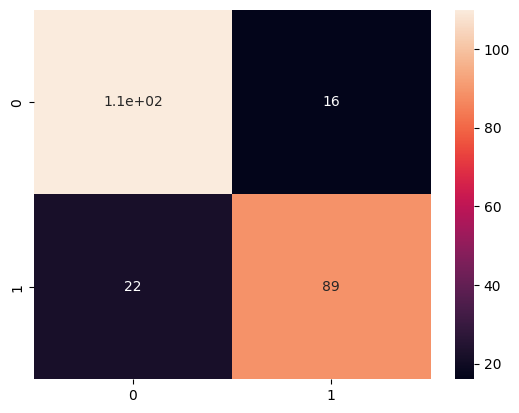

In [34]:
#Print the results from the third data
print_score(X_train3, y_train3, model3, 'Training')

Testing  Result:
Accuracy Score: 80.00%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.805556   0.791667       0.8   0.798611      0.799537
recall      0.852941   0.730769       0.8   0.791855      0.800000
f1-score    0.828571   0.760000       0.8   0.794286      0.798857
support    34.000000  26.000000       0.8  60.000000     60.000000
_______________________________________________
Confusion Matrix: 
 [[29  5]
 [ 7 19]]



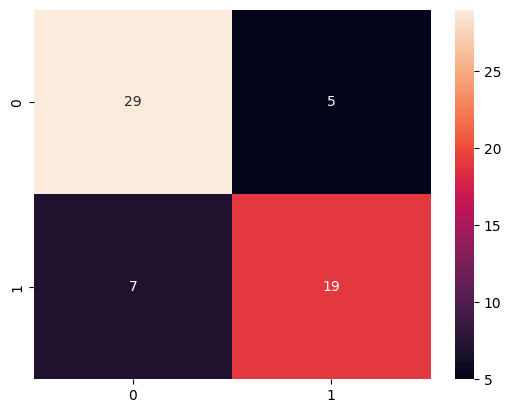

In [35]:
#Print the results from the third data
print_score(X_test3, y_test3, model3, 'Testing')

##ROC Curves

ROC AUC = 0.88


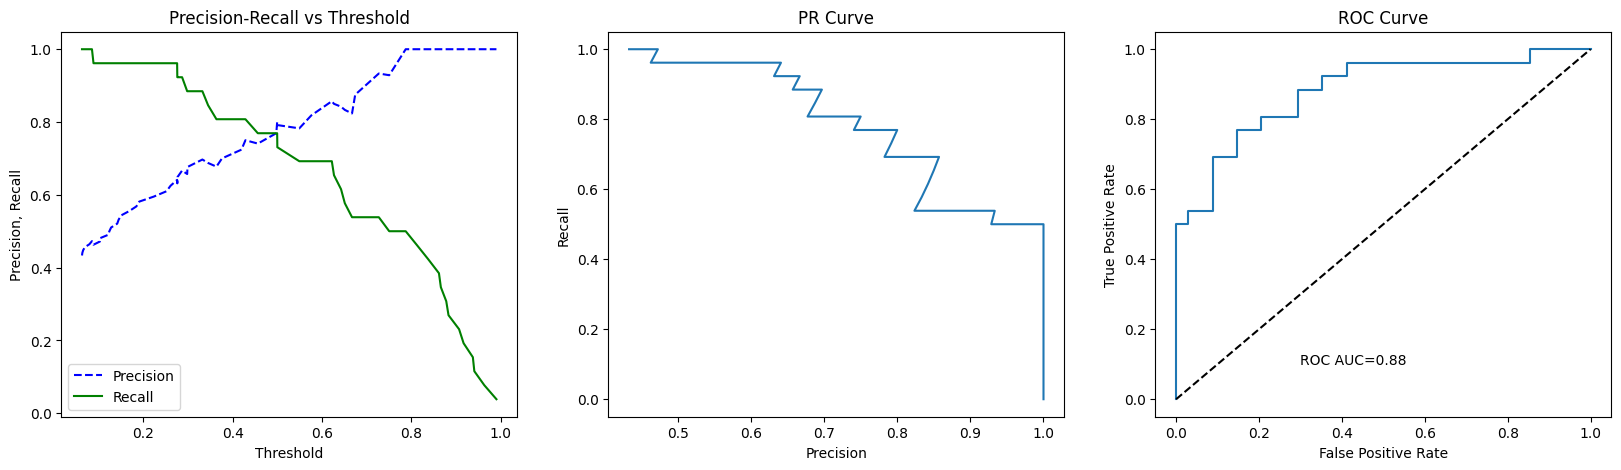

In [36]:
# predict crisp values and probabilities
y_pred = model3.predict(X_test3) # crisp predictions (0 or 1)
y_probs = model3.predict_proba(X_test3) # probability predictions between [0, 1]
'''
y_probs is a 2D array where
column0 is the probability of being labelled as 0
column1 is the probability of being labelled as 1 << we want this one
it will be y_probs[:, 1]
'''

# use crisp and proba to derive the metrics
precision, recall, thresholds = precision_recall_curve(y_test3, y_probs[:,1]) 

# PR curve with various thresholds
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.title("Precision-Recall vs Threshold")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "g-", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")

# P versus R curve
plt.subplot(1, 3, 2)
plt.plot(precision, recall)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve");

# ROC curve (FPR versus FNR)

ax3 = plt.subplot(1, 3, 3)
fpr, tpr, thresholds = roc_curve(y_test3, y_probs[:,1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], "k--") # the dashed line (50-50 prediction)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

# AUC

pr_auc = np.round(auc(recall, precision),2)
ax3.text(0.3, 0.1, 'ROC AUC='+str(pr_auc))#, horizontalalignment='center', verticalalignment='center', transform=ax3.transAxes)

print('ROC AUC =', pr_auc)

##Analysis

This model produces the best results with 90% accuracy and highest AUC of 0.96.


# Test Cases

## Import Test Cases

In [37]:
#Import test cases
TC1 = pd.read_csv("TestCase1.csv")
TC2 = pd.read_csv("TestCase2.csv")
TC3 = pd.read_csv("TestCase3.csv")

TC1 = TC1.drop(columns=['chol', 'fbs'], axis=1)
TC2 = TC2.drop(columns=['chol', 'fbs'], axis=1)
TC3 = TC3.drop(columns=['chol', 'fbs'], axis=1)


##Run each case through grouping method

In [38]:
newpeak_list = []
for i in TC1.oldpeak.values:
    a = len(TC1[(TC1.oldpeak == i) & (TC1.condition == 1)]) / len(TC1[(TC1.oldpeak == i)])
    if a == 1:
        newpeak_list.append(2)
    elif a > 0.50:
        newpeak_list.append(1)
    else:
        newpeak_list.append(0)
TC1["new_peak"] = newpeak_list


new_cp_list = []
for i in TC1.cp.values:
    if i == 3:
        new_cp_list.append(1)
    else:
        new_cp_list.append(0)   
TC1["cp_is_3"] = new_cp_list


new_res_list = []
for i in TC1.restecg.values:
    if i == 1:
        new_res_list.append(1)
    else:
        new_res_list.append(0)      
TC1["res_is_1"] = new_res_list


new_slope_list = []
for i in TC1.slope.values:
    if i == 0:
        new_slope_list.append(1)
    else:
        new_slope_list.append(0)       
TC1["slope_is_0"] = new_slope_list


new_ca_list = []
for i in TC1.ca.values:
    if i == 0:
        new_ca_list.append(1)
    else:
        new_ca_list.append(0)
TC1["ca_is_0"] = new_ca_list

new_thal_list = []
for i in TC1.thal.values:
    if i == 0:
        new_thal_list.append(1)
    else:
        new_thal_list.append(0)        
TC1["thal_is_0"] = new_thal_list


TC1 = TC1.drop(["oldpeak","cp","restecg","slope","ca","thal"],axis=1)

In [39]:
newpeak_list = []
for i in TC2.oldpeak.values:
    a = len(TC2[(TC2.oldpeak == i) & (TC2.condition == 1)]) / len(TC2[(TC2.oldpeak == i)])
    if a == 1:
        newpeak_list.append(2)
    elif a > 0.50:
        newpeak_list.append(1)
    else:
        newpeak_list.append(0)
TC2["new_peak"] = newpeak_list


new_cp_list = []
for i in TC2.cp.values:
    if i == 3:
        new_cp_list.append(1)
    else:
        new_cp_list.append(0)   
TC2["cp_is_3"] = new_cp_list


new_res_list = []
for i in TC2.restecg.values:
    if i == 1:
        new_res_list.append(1)
    else:
        new_res_list.append(0)      
TC2["res_is_1"] = new_res_list


new_slope_list = []
for i in TC2.slope.values:
    if i == 0:
        new_slope_list.append(1)
    else:
        new_slope_list.append(0)       
TC2["slope_is_0"] = new_slope_list


new_ca_list = []
for i in TC2.ca.values:
    if i == 0:
        new_ca_list.append(1)
    else:
        new_ca_list.append(0)
TC2["ca_is_0"] = new_ca_list

new_thal_list = []
for i in TC2.thal.values:
    if i == 0:
        new_thal_list.append(1)
    else:
        new_thal_list.append(0)        
TC2["thal_is_0"] = new_thal_list


TC2 = TC2.drop(["oldpeak","cp","restecg","slope","ca","thal"],axis=1)

In [40]:
newpeak_list = []
for i in TC3.oldpeak.values:
    a = len(TC3[(TC3.oldpeak == i) & (TC3.condition == 1)]) / len(TC3[(TC3.oldpeak == i)])
    if a == 1:
        newpeak_list.append(2)
    elif a > 0.50:
        newpeak_list.append(1)
    else:
        newpeak_list.append(0)
TC3["new_peak"] = newpeak_list


new_cp_list = []
for i in TC3.cp.values:
    if i == 3:
        new_cp_list.append(1)
    else:
        new_cp_list.append(0)   
TC3["cp_is_3"] = new_cp_list


new_res_list = []
for i in TC3.restecg.values:
    if i == 1:
        new_res_list.append(1)
    else:
        new_res_list.append(0)      
TC3["res_is_1"] = new_res_list


new_slope_list = []
for i in TC3.slope.values:
    if i == 0:
        new_slope_list.append(1)
    else:
        new_slope_list.append(0)       
TC3["slope_is_0"] = new_slope_list


new_ca_list = []
for i in TC3.ca.values:
    if i == 0:
        new_ca_list.append(1)
    else:
        new_ca_list.append(0)
TC3["ca_is_0"] = new_ca_list

new_thal_list = []
for i in TC3.thal.values:
    if i == 0:
        new_thal_list.append(1)
    else:
        new_thal_list.append(0)        
TC3["thal_is_0"] = new_thal_list


TC3 = TC3.drop(["oldpeak","cp","restecg","slope","ca","thal"],axis=1)

##Results

In [41]:
#Test Case 1
TC1X = TC1.loc[:, TC1.columns != 'condition']
TC1y = model3.predict(TC1X)
TC1y_probs = model3.predict_proba(TC1X)


print('There is', TC1y_probs[:,1], 'The patient does have heart disease. (1)')
print('There is', TC1y_probs[:,0], 'The patient does not have heart disease. (0)')
print('The actually result is', TC1.condition.to_string(index=False))

There is [0.94990146] The patient does have heart disease. (1)
There is [0.05009854] The patient does not have heart disease. (0)
The actually result is 1


In [42]:
#Test Case 2
TC2X = TC2.loc[:, TC2.columns != 'condition']

TC2y = model3.predict(TC2X)
TC2y_probs = model3.predict_proba(TC2X)


print('There is', TC2y_probs[:,1], 'The patient does have heart disease. (1)')
print('There is', TC2y_probs[:,0], 'The patient does not have heart disease. (0)')
print('The actually result is', TC2.condition.to_string(index=False))

There is [0.96946005] The patient does have heart disease. (1)
There is [0.03053995] The patient does not have heart disease. (0)
The actually result is 1


In [43]:
#Test Case 3
TC3X = TC3.loc[:, TC3.columns != 'condition']

TC3y = model3.predict(TC3X)
TC3y_probs = model3.predict_proba(TC3X)


print('There is', TC3y_probs[:,1], 'The patient does have heart disease. (1)')
print('There is', TC3y_probs[:,0], 'The patient does not have heart disease. (0)')
print('The actually result is', TC3.condition.to_string(index=False))

There is [0.35576959] The patient does have heart disease. (1)
There is [0.64423041] The patient does not have heart disease. (0)
The actually result is 0
